In [ ]:
!pip install nltk
!pip install textstat
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import textstat
from textblob import TextBlob
import nltk

# Download the stopwords from nltk
nltk.download('punkt')
nltk.download('stopwords')

# Keyword Matching Function
def keyword_matching(text1, text2):
    stop_words = set(stopwords.words('english'))
    word_tokens1 = word_tokenize(text1)
    word_tokens2 = word_tokenize(text2)
    filtered_sentence1 = [w.lower() for w in word_tokens1 if not w.lower() in stop_words]
    filtered_sentence2 = [w.lower() for w in word_tokens2 if not w.lower() in stop_words]
    matching_keywords = set(filtered_sentence1).intersection(set(filtered_sentence2))
    return len(matching_keywords)

# Readability Score Function
def readability_score(text):
    return textstat.flesch_reading_ease(text)

# Sentiment Analysis Function
def sentiment_analysis(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Keyword Matching Function
def keyword_matching_context(context, answer):
    stop_words = set(stopwords.words('english'))
    context_words = set(word_tokenize(context.lower()))
    answer_words = set(word_tokenize(answer.lower()))
    context_words = context_words - stop_words
    answer_words = answer_words - stop_words
    common_words = context_words.intersection(answer_words)
    return len(common_words)

# New Metric Function
def keyword_matching_context_realtive(context, answer):
    keyword_score = keyword_matching_context(context, answer)
    total_words = len(word_tokenize(answer))
    return keyword_score #/ total_words if total_words != 0 else 0

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Read CSV file into a DataFrame
df = pd.read_csv('Results.csv')  # Replace 'your_file.csv' with your actual file name

In [ ]:
df=df.iloc[:13]

In [ ]:
df = df.drop(index=3)

# Drop the last row
df = df.drop(index=df.index[-1])

# Reset the index
df = df.reset_index(drop=True)



In [ ]:
df

,Context,Question,Model Answer,Expected Answer
0,"Current fees are around 260 euro per year, of ...",What's the total cost per year?,The total cost per year is around 260 euro per...,The total cost per year is around 260 euro.
1,"Current fees are around 260 euro per year, of ...",What are admin fees for?,The administration fees for the doctoral schoo...,The admin fees are for administrative services...
2,"Current fees are around 260 euro per year, of ...",How much for academic tutoring?,The academic tutoring fee is 210 euro per year...,The cost for academic tutoring is 210 euro per...
3,Following information is regarding PhD program...,How much does a PhD cost at University of Bale...,The cost of a PhD program at University of Bal...,The cost for a PhD program at the University o...
4,Following information is regarding PhD program...,Any fees for accidents at PhD program of Unive...,The University of Balearic Islands has a docto...,"Yes, in the PhD program of the University of B..."
5,"In this instance, the originals must be submit...",When do the originals need to be submitted?,The originals must be submitted between 1st No...,The originals must be submitted between 1st No...
6,On a PhD programme at University of Balearic I...,Do I need to take face-to-face classes on a Ph...,"Yes, you will need to take face-to-face classe...","No, on a PhD programme at the University of Ba..."
7,At University of Balearic Islands Both the the...,How are thesis tutors and supervisors assigned...,The thesis tutor and supervisor are assigned b...,"At the University of Balearic Islands, both th..."
8,At the University of Balearic Islands PhD cand...,What does a PhD comprise at the University of ...,The PhD is a research degree awarded by the Un...,"At the University of Balearic Islands, a PhD c..."
9,The University of Balearic Islands has establi...,What is the minimum number of credits I must p...,The minimum number of credits required to cont...,The minimum number of credits you must pass to...


In [ ]:
# Create empty lists to store evaluation results
keyword_scores = []
keyword_context_scores_human = []
keyword_context_scores_model = []
readability_scores_human = []
readability_scores_model = []
sentiment_scores_human = []
sentiment_scores_model = []

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    context = row['Context']
    question = row['Question']
    model_answer = row['Model Answer']
    expected_answer = row['Expected Answer']

    # Evaluate Keyword Matching
    keyword_scores.append(keyword_matching(model_answer, expected_answer))
    # Evaluate Keyword Matching with context
    keyword_context_scores_human.append(keyword_matching_context_realtive(context, expected_answer))
    keyword_context_scores_model.append(keyword_matching_context_realtive(context, model_answer))
    # Evaluate Readability Score
    readability_scores_human.append(readability_score(expected_answer))
    readability_scores_model.append(readability_score(model_answer))

    # Evaluate Sentiment Analysis
    sentiment_scores_human.append(sentiment_analysis(expected_answer))
    sentiment_scores_model.append(sentiment_analysis(model_answer))

# Add evaluation results to DataFrame
df['keyword_matching'] = keyword_scores
df['keyword_matching_context_EA'] = keyword_context_scores_human
df['keyword_matching_context_MA'] = keyword_context_scores_model
df['readability_score_EA'] = readability_scores_human
df['readability_score_MA'] = readability_scores_model
df['sentiment_score_EA'] = sentiment_scores_human
df['sentiment_score_MA'] = sentiment_scores_model

# Save the DataFrame with evaluation results to a new CSV file
df.to_csv('evaluated_file.csv', index=False)  # The results will be saved in 'evaluated_file.csv'

In [ ]:
df

,Context,Question,Model Answer,Expected Answer,keyword_matching,keyword_matching_context_EA,keyword_matching_context_MA,readability_score_EA,readability_score_MA,sentiment_score_EA,sentiment_score_MA
0,"Current fees are around 260 euro per year, of ...",What's the total cost per year?,The total cost per year is around 260 euro per...,The total cost per year is around 260 euro.,8,6,32,96.18,36.63,0.000000,0.114286
1,"Current fees are around 260 euro per year, of ...",What are admin fees for?,The administration fees for the doctoral schoo...,The admin fees are for administrative services...,2,8,17,28.84,38.32,0.000000,0.160000
2,"Current fees are around 260 euro per year, of ...",How much for academic tutoring?,The academic tutoring fee is 210 euro per year...,The cost for academic tutoring is 210 euro per...,7,7,7,69.79,78.75,0.000000,0.000000
3,Following information is regarding PhD program...,How much does a PhD cost at University of Bale...,The cost of a PhD program at University of Bal...,The cost for a PhD program at the University o...,12,11,37,78.59,33.58,0.000000,0.133333
4,Following information is regarding PhD program...,Any fees for accidents at PhD program of Unive...,The University of Balearic Islands has a docto...,"Yes, in the PhD program of the University of B...",9,19,12,45.59,32.22,0.000000,0.000000
5,"In this instance, the originals must be submit...",When do the originals need to be submitted?,The originals must be submitted between 1st No...,The originals must be submitted between 1st No...,10,10,61,64.71,42.92,0.000000,0.020000
6,On a PhD programme at University of Balearic I...,Do I need to take face-to-face classes on a Ph...,"Yes, you will need to take face-to-face classe...","No, on a PhD programme at the University of Ba...",12,24,25,50.46,52.49,0.000000,0.025000
7,At University of Balearic Islands Both the the...,How are thesis tutors and supervisors assigned...,The thesis tutor and supervisor are assigned b...,"At the University of Balearic Islands, both th...",23,26,25,33.24,39.03,0.200000,0.300000
8,At the University of Balearic Islands PhD cand...,What does a PhD comprise at the University of ...,The PhD is a research degree awarded by the Un...,"At the University of Balearic Islands, a PhD c...",7,22,7,28.84,51.68,0.125000,0.455000
9,The University of Balearic Islands has establi...,What is the minimum number of credits I must p...,The minimum number of credits required to cont...,The minimum number of credits you must pass to...,21,33,30,51.82,26.14,-0.109524,0.150000


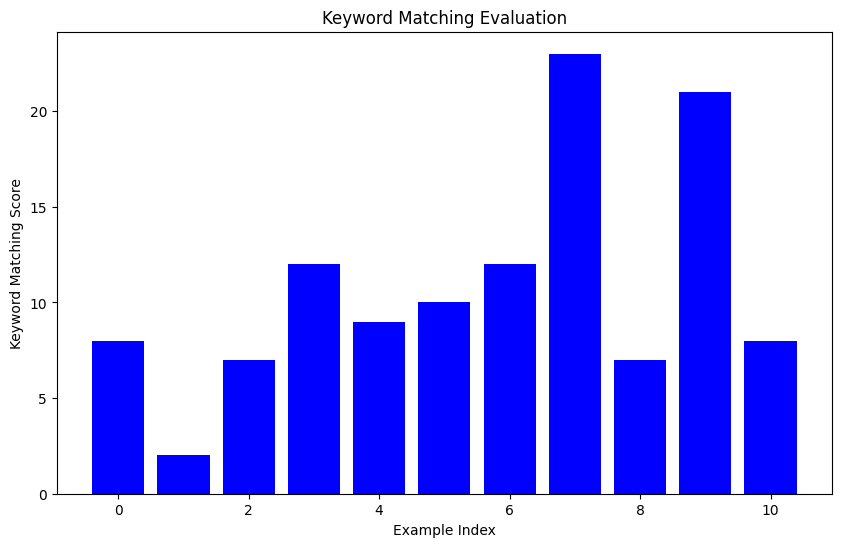

In [ ]:
import matplotlib.pyplot as plt

# Create bar graph for Keyword Matching
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['keyword_matching'], color='blue')
plt.xlabel('Example Index')
plt.ylabel('Keyword Matching Score')
plt.title('Keyword Matching Evaluation')
plt.show()

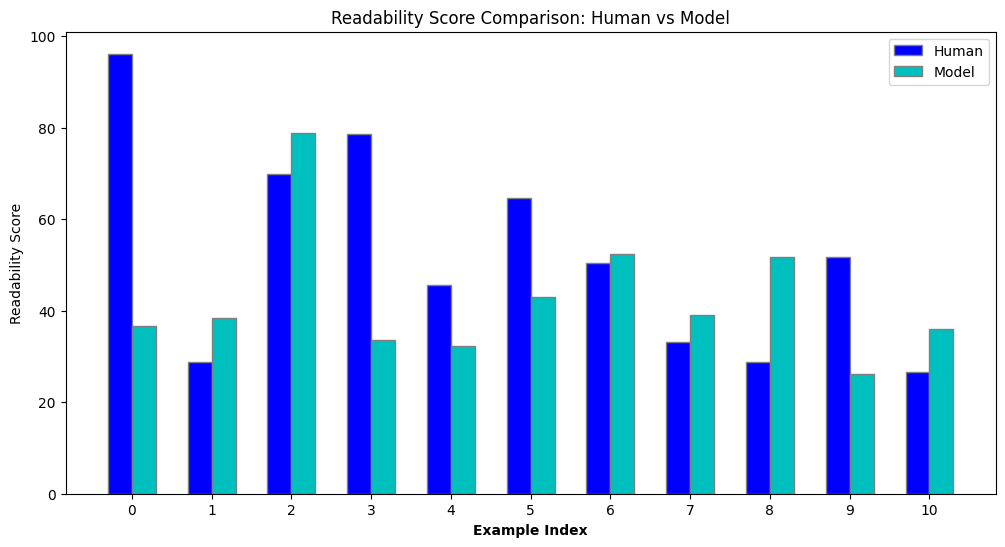

In [ ]:
# Bar graph for Readability Score
plt.figure(figsize=(12, 6))
barWidth = 0.3

# Set position of bar on X axis
r1 = df.index
r2 = [x + barWidth for x in r1]

plt.bar(r1, df['readability_score_EA'], color='b', width=barWidth, edgecolor='grey', label='Human')
plt.bar(r2, df['readability_score_MA'], color='c', width=barWidth, edgecolor='grey', label='Model')

plt.xlabel('Example Index', fontweight='bold')
plt.ylabel('Readability Score')
plt.title('Readability Score Comparison: Human vs Model')
plt.xticks([r + barWidth/2 for r in r1], df.index)
plt.legend()
plt.show()


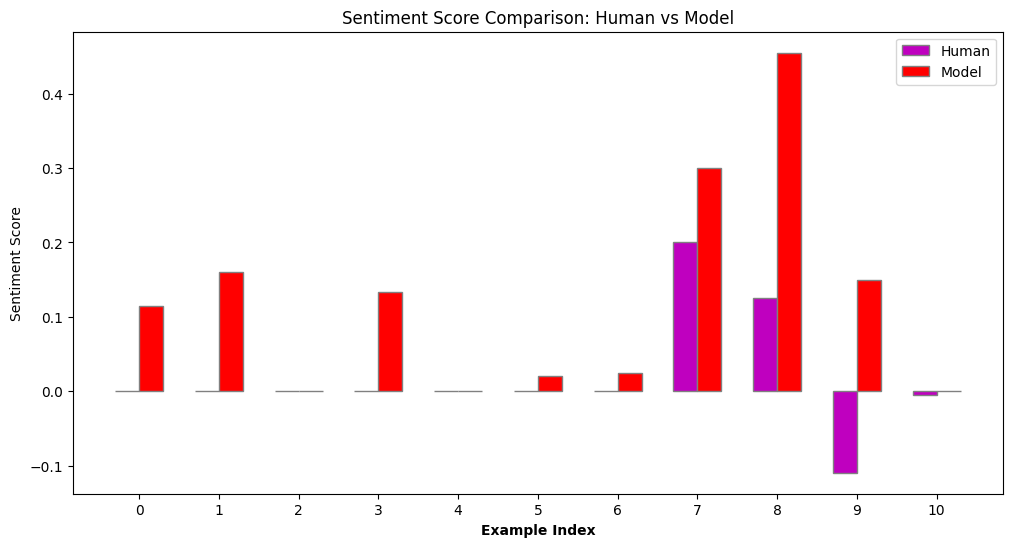

In [ ]:
# Bar graph for Sentiment Analysis
plt.figure(figsize=(12, 6))

plt.bar(r1, df['sentiment_score_EA'], color='m', width=barWidth, edgecolor='grey', label='Human')
plt.bar(r2, df['sentiment_score_MA'], color='r', width=barWidth, edgecolor='grey', label='Model')

plt.xlabel('Example Index', fontweight='bold')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Comparison: Human vs Model')
plt.xticks([r + barWidth/2 for r in r1], df.index)
plt.legend()
plt.show()

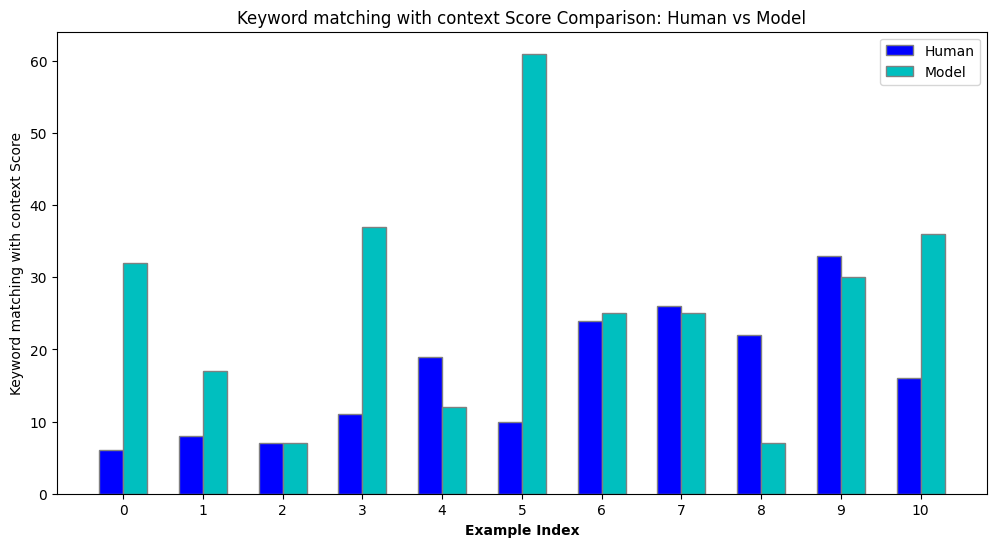

In [ ]:
# Bar graph for Readability Score
plt.figure(figsize=(12, 6))
barWidth = 0.3

# Set position of bar on X axis
r1 = df.index
r2 = [x + barWidth for x in r1]

plt.bar(r1, df['keyword_matching_context_EA'], color='b', width=barWidth, edgecolor='grey', label='Human')
plt.bar(r2, df['keyword_matching_context_MA'], color='c', width=barWidth, edgecolor='grey', label='Model')

plt.xlabel('Example Index', fontweight='bold')
plt.ylabel('Keyword matching with context Score')
plt.title('Keyword matching with context Score Comparison: Human vs Model')
plt.xticks([r + barWidth/2 for r in r1], df.index)
plt.legend()
plt.show()

In [ ]:
df.to_csv('evaluated_file.csv', index=False)
